In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
tf.__version__

'2.15.0'

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

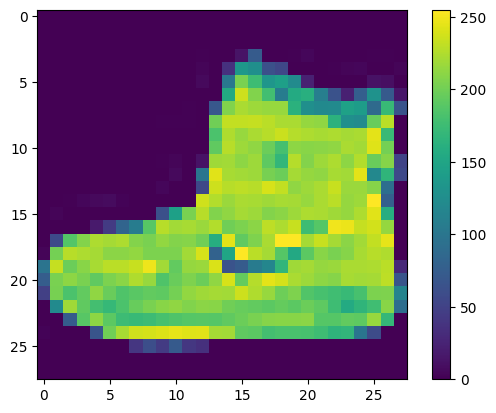

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

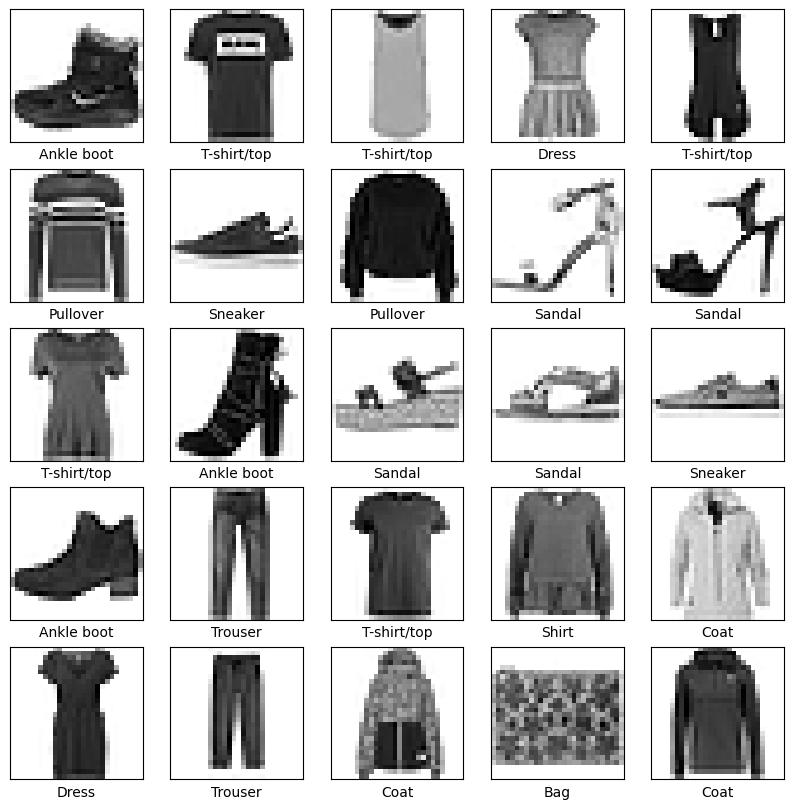

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4942 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3733 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3343 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3106 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2939 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2668 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2568 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2468 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3273 - accuracy: 0.8870 - 930ms/epoch - 3ms/step

Test accuracy: 0.8870000243186951


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [20]:
predictions[0]

array([2.7535107e-06, 9.6954333e-10, 6.8934392e-09, 1.6622013e-11,
       2.5071749e-09, 1.6618017e-04, 1.0639666e-06, 1.3937148e-02,
       4.3819149e-08, 9.8589283e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

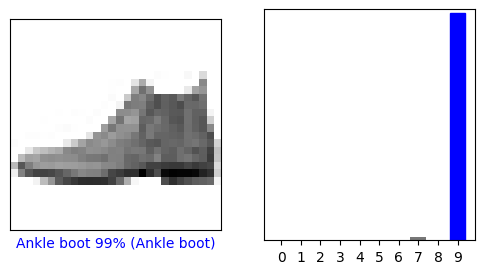

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

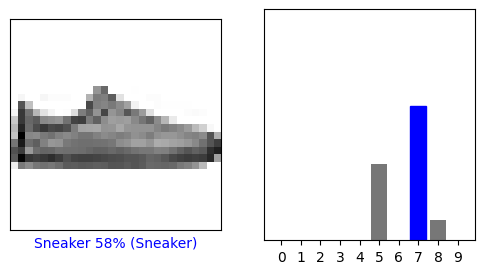

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

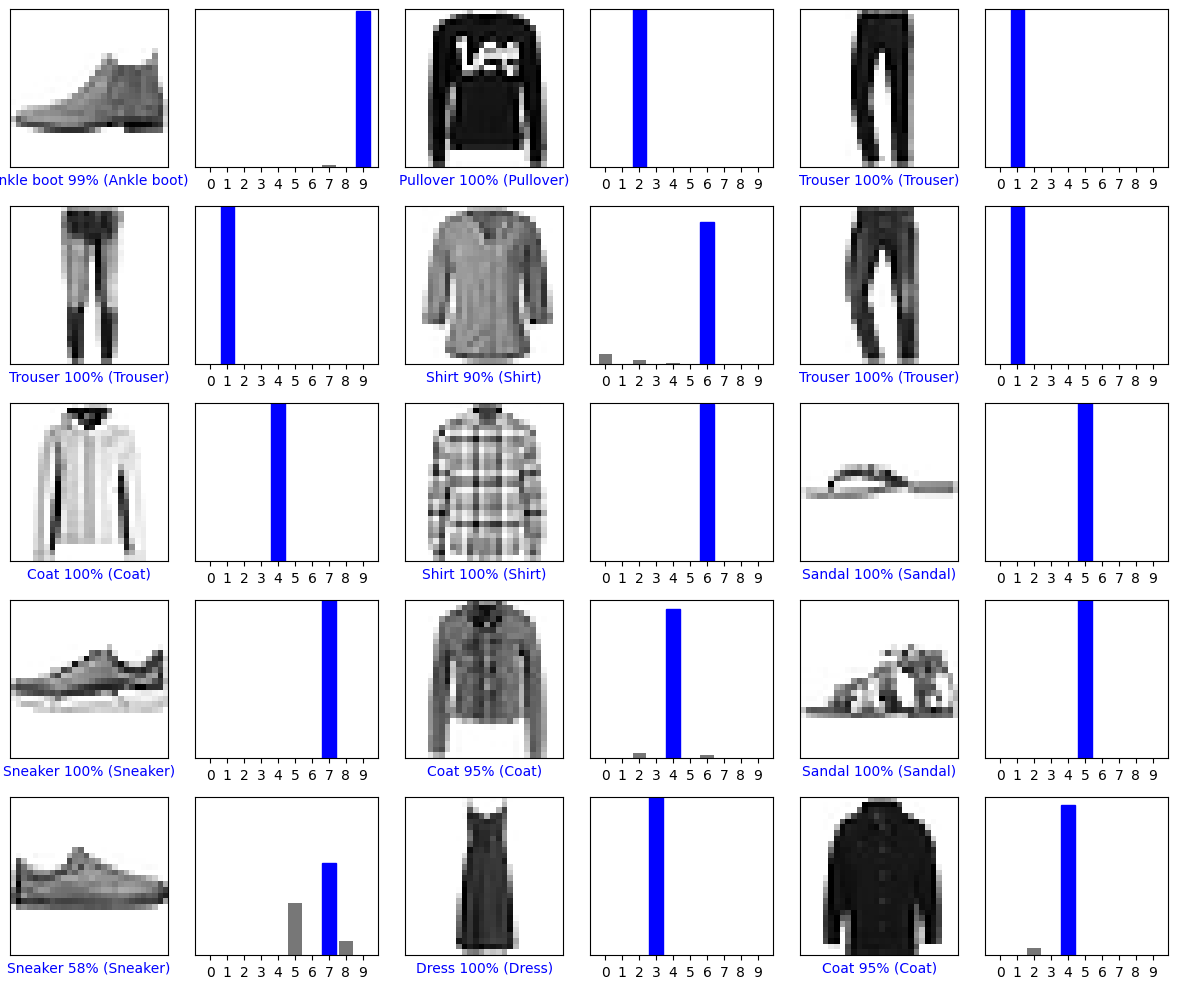

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [69]:
img = test_images[2]
img.shape

(28, 28)

In [70]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [71]:
pred_S = probability_model.predict(img)
pred_S

1/1 [==============================] - 0s 33ms/step


array([[1.3279714e-09, 1.0000000e+00, 8.0516843e-13, 6.2218543e-11,
        6.3451948e-12, 1.3973047e-15, 1.2535153e-12, 1.0240782e-29,
        5.0480373e-15, 4.9154037e-21]], dtype=float32)

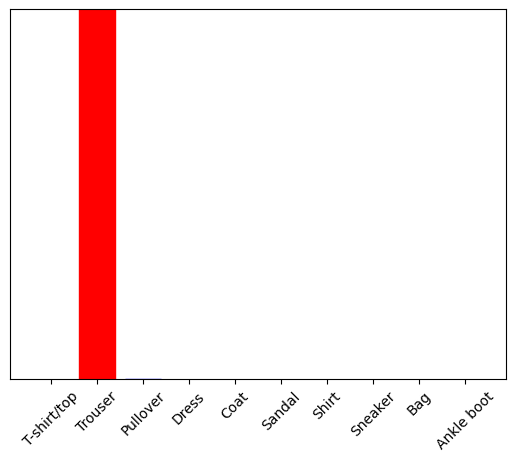

In [74]:
plot_value_array(1, pred_S[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [72]:
np.argmax(pred_S[0])

1